# Exploring neighborhoods of Staten Island of New York City to open a restaurant

## Introduction

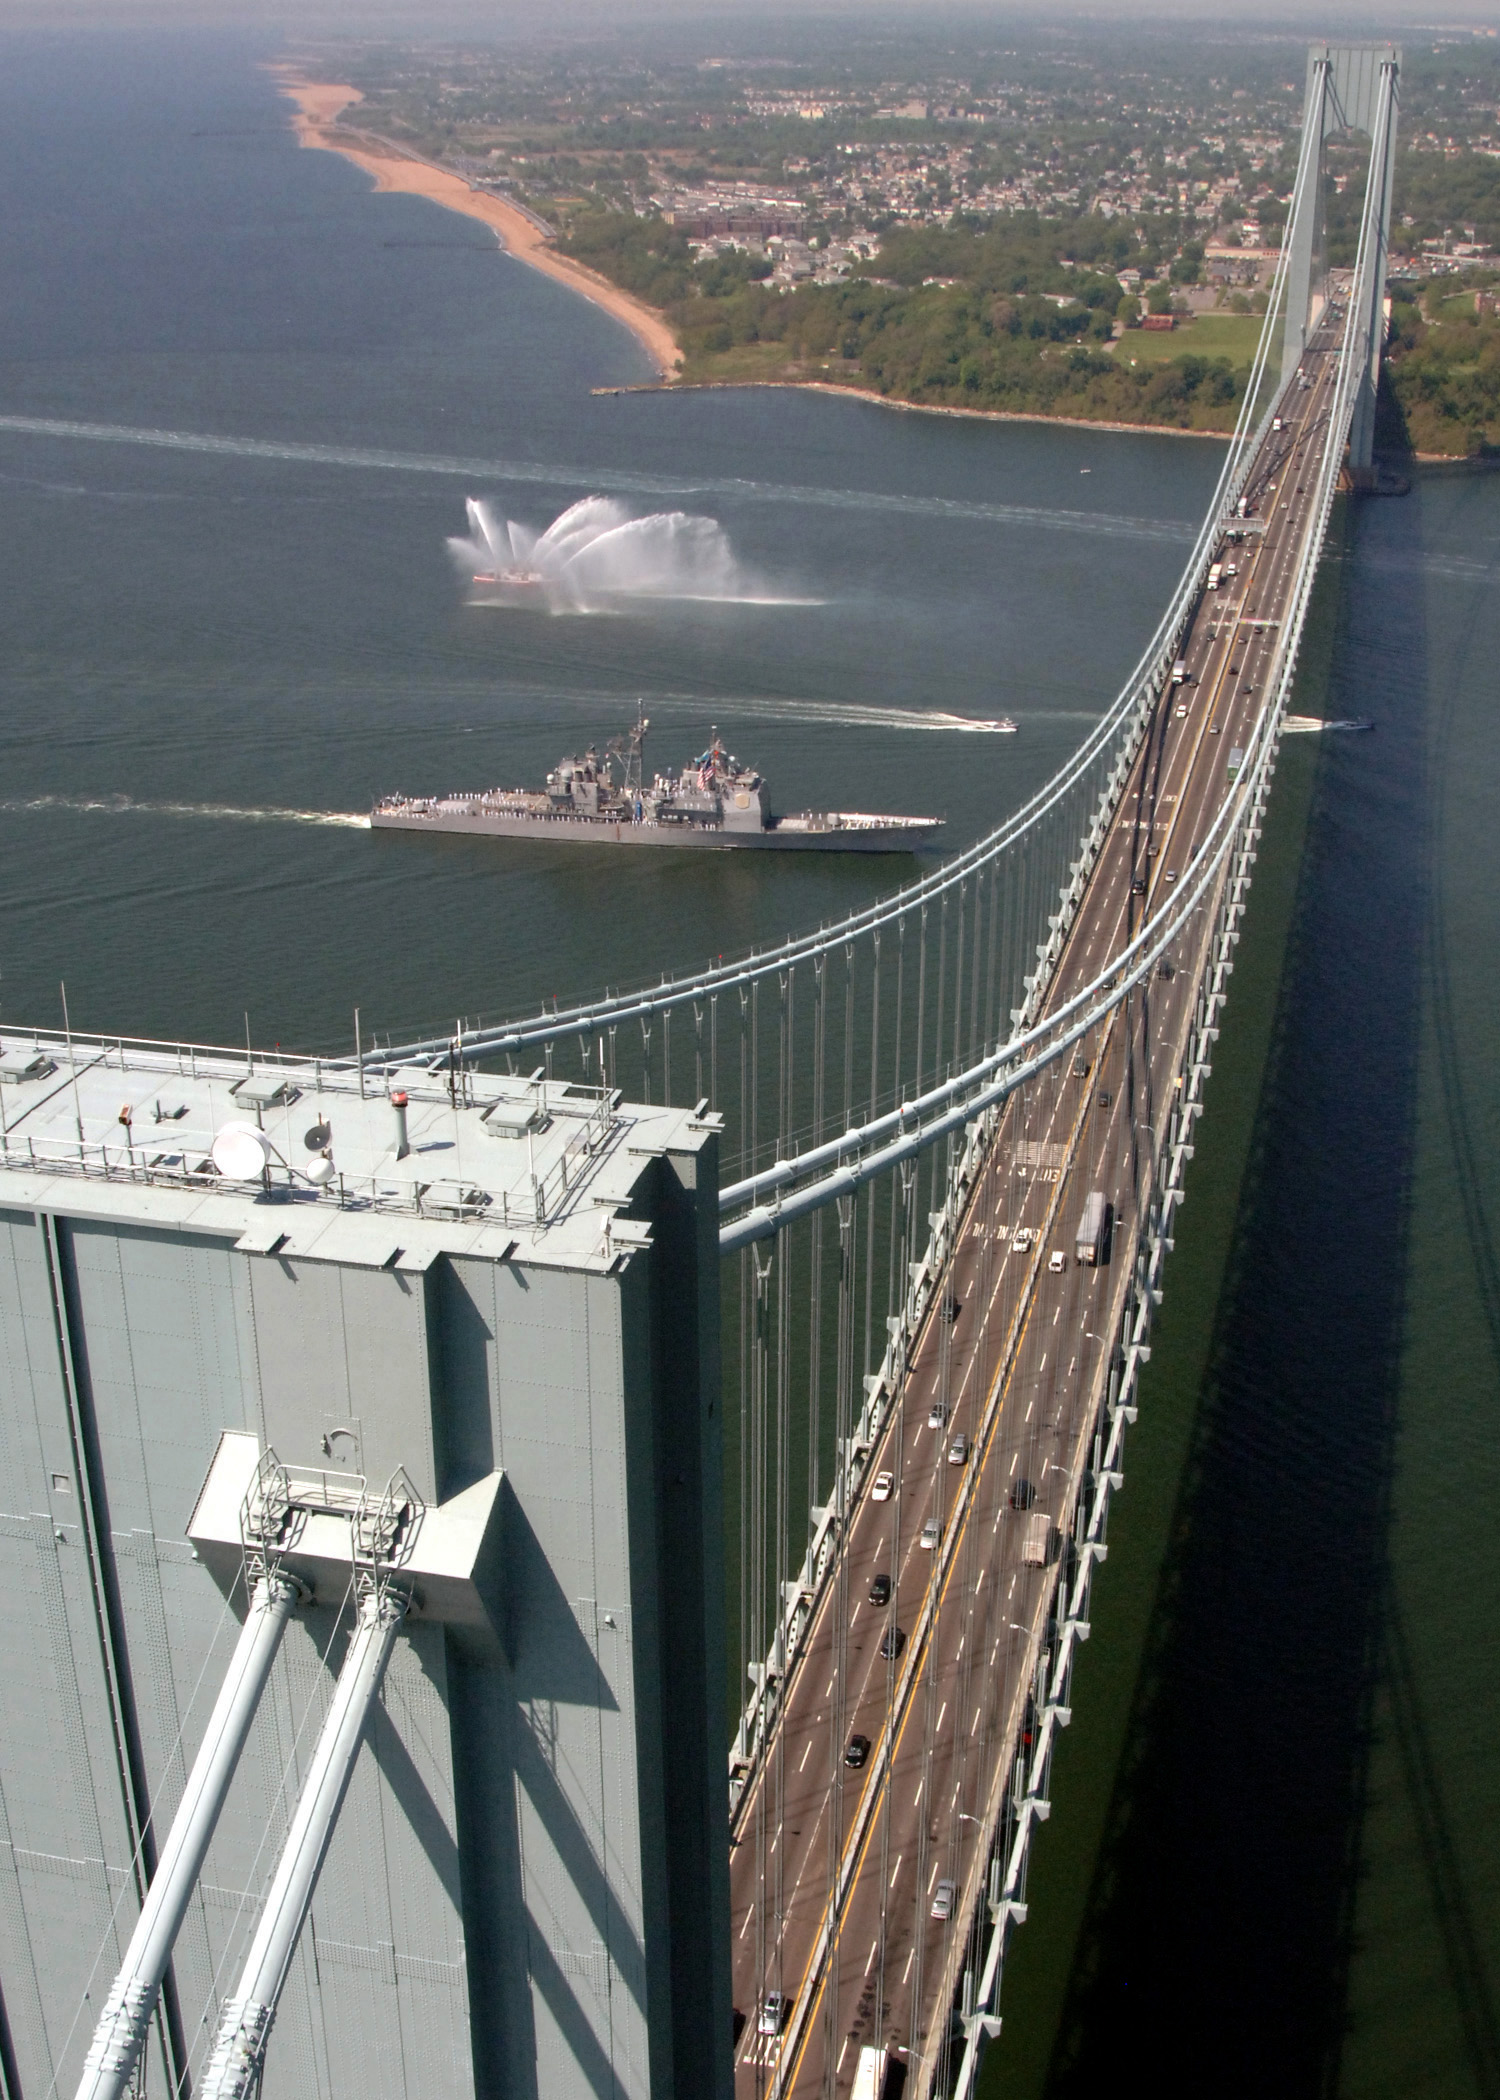

In [9]:
from PIL import Image
import requests
url = 'https://upload.wikimedia.org/wikipedia/commons/7/71/USS_Leyte_Gulf_%28CG_55%29_under_the_Verrazano_Narrows_Bridge.jpg'
nyc_image = Image.open(requests.get(url, stream=True).raw)
nyc_image

New York City (NYC), is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. The city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities.

Staten Island of New York City is the least populated of the 5 boroughs of New York City with an estimated population of 476,143 in 2019, but is the third-largest in land area at 58.5 sq mi (152 km2).

## Problem

In such a large borough with least population, finding a suitable location to open a restaurent is a daunting task. In this project, we will explore neighbourhoods of Staten Island and find which cuisines are popular in each neighbourhood, understand its demographic trends.

This analysis can be used to find a suitable neighbourhood for a restaurant. Additionally, this can also be used by a tourist travelling to Staten Island, New York City to visit neighbourhoods he/she prefers or a family looking forward to move to Staten Island, New York City and could decide which neighbourhood is best suited for them.

## Data

## To understand and explore we will need the following

1. New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

   New York City Department of City Planning published this data at https://geo.nyu.edu/catalog/nyu_2451_34572

   Data will look like below.

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',

2. Foursquare Developers Access to venue data: https://foursquare.com/developers/apps
   
   Foursquare is a location data provider, which will be used to make RESTful API calls to retrieve data about  restaurents in different neighborhoods.
   
   Below is an example of data.

{'meta': {'code': 200, 'requestId': '5e9309d1949393001b60baad'},
 'response': {'categories': [{'categories': [{'categories': [],
                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
                                                       'suffix': '.png'},
                                              'id': '56aa371be4b08b9a8d5734db',
                                              'name': 'Amphitheater',
                                              'pluralName': 'Amphitheaters',
                                              'shortName': 'Amphitheater'},
                                             {'categories': [],
                                              'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
                                                       'suffix': '.png'},
                                              'id': '4fceea171983d5d06c3e9823',

# Methodology

Import all required libraries and download New York City dataset which contains alot of information about New York City. From this analyze and clean the data to pull data of borough, neighbourhoods, their latitude and longitude. This data exist in features dictionary, so transform it into pandas dataframe by looping trough the whole dataset to pull all required data.

Download all required dependencies

In [16]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from collections import Counter # count occurrences 
import folium # map rendering library
import wget
import os
if os.path.exists('newyork_data.json'):
    os.remove('newyork_data.json')
wget.download('https://cocl.us/new_york_dataset/newyork_data.json')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
from pprint import pprint # data pretty printer
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
nyc_neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lon = neighborhood_latlon[0]
    neighborhood_lat = neighborhood_latlon[1]
        
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Once done, data will look like below.

In [17]:
nyc_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

The dataframe consists 5 boroughs of New York City data but we are exploring only Staten Island, so strip the data to extract only Staten Island neighbourhoods. 

After this data will look like below.

In [18]:
SI_neighborhoods = nyc_neighborhoods[nyc_neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
SI_neighborhoods.head()

Borough   Neighborhood   Latitude  Longitude
0  Staten Island     St. George  40.644982 -74.079353
1  Staten Island   New Brighton  40.640615 -74.087017
2  Staten Island      Stapleton  40.626928 -74.077902
3  Staten Island       Rosebank  40.615305 -74.069805
4  Staten Island  West Brighton  40.631879 -74.107182

To get an geographical idea of Staten Island neighbourhoods, superimpose them over New York City map. Geopy library was used to get the latitude and longitude values of New York City which are 40.7127281, -74.0060152.

Folium library is used for generation of the map which looks like below.

In [19]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_nyc_SI = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(SI_neighborhoods['Latitude'], SI_neighborhoods['Longitude'], SI_neighborhoods['Borough'], SI_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc_SI)  
    
map_nyc_SI

Now Foursquare API is used to find all restaurents within each neighbourhoods of Staten Island. 

To use the Foursquare API, Credentials such as clientId, clientSecret and Version details are passed along with latitude and longitude of a location in below format.



    https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT


Since we are looking for restaurent details, we have to search for food category which has a category id of 4d4b7105d754a06374d81259. Radius of 400 and limit of 100 are used for this analysis.

Since Fouresquare will provide results for a specific location using latitude and longitude, a function getNearbyFood is written to spin through all neighbourhoods.

In [20]:
CLIENT_ID = 'EPGMBXZ5TDS4J3CTQTAXIP5DSIAMYSAPWFZ5D2DBKJQU2XR0' # your Foursquare ID
CLIENT_SECRET = 'ECFCR3CNIGXJEYCWHZ1X2L30XJOJFNW3VIULS4W3N5LBULNY' # your Foursquare Secret
VERSION = '20200409' # Foursquare API version
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()
category_list = category_results['response']['categories']
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')
def getNearbyFood(names, latitudes, longitudes, radius=400, LIMIT=100):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print(f"{not_found} venues with incompelete information.")
    return(nearby_venues)

To counter any redundant requests to the Foursquare API, pickle is used to serialize the information retrieved from GET requests, to make a persistent file. This file can later be deserialized to retrieve an exact python object structure. This is a crucial step as it will counter any redundant requests to the Foursquare API, which is chargeable over the threshold limits.

In [22]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('SI_food_venues.pkl', 'rb') as f:
        SI_venues = pickle.load(f)
    
except:
    SI_venues = getNearbyFood(names=SI_neighborhoods['Neighborhood'],
                              latitudes=SI_neighborhoods['Latitude'],
                              longitudes=SI_neighborhoods['Longitude'])
    
    with open('SI_food_venues.pkl', 'wb') as f:
        pickle.dump(SI_venues, f)

Resulted data looks like below.

In [23]:
SI_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   St. George              40.644982              -74.079353   
1   St. George              40.644982              -74.079353   
2   St. George              40.644982              -74.079353   
3   St. George              40.644982              -74.079353   
4   St. George              40.644982              -74.079353   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Charmar Superrette       40.643971       -74.077482         Deli / Bodega  
1      Chang Noi Thai       40.643692       -74.077957       Thai Restaurant  
2        A&S Pizzeria       40.643940       -74.077626           Pizza Place  
3  The Burrito Shoppe       40.643639       -74.077919  Fast Food Restaurant  
4    The Salad Junkie       40.643868       -74.077656           Salad Place

# Data Cleaning

Now we have data of neighborhoods with their latitude, longitude and restaurents located in the neighborhoods with their latitude, longitudes and their category.

But not every venue category can be used because we are only interested in restaurents.

Find how many unique categories can be curated from all the returned venues

In [24]:
print(f"There are {len(SI_venues['Venue Category'].unique())} uniques categories.")
SI_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 92 uniques categories.


Venue Category
Deli / Bodega                               126
Pizza Place                                 114
Italian Restaurant                           70
Chinese Restaurant                           41
Bagel Shop                                   41
Bakery                                       34
Mexican Restaurant                           33
Ice Cream Shop                               32
American Restaurant                          32
Food                                         31
Sandwich Place                               26
Café                                         23
Coffee Shop                                  22
Restaurant                                   21
Donut Shop                                   17
Sushi Restaurant                             16
Fast Food Restaurant                         15
Food Truck                                   12
Diner                                        12
Spanish Restaurant                           11
BBQ Joint                

We can see that there are many generalized categories, like Restaurent, Food, Garden, Pub exist in the dataframe, so remove those categories by creating a list of generalized categories as below.

In [26]:
unique_categories = SI_venues['Venue Category'].unique().tolist()

# manually create a list of generalized categories
general_categories = ['Food','Café','Coffee Shop','Restaurant','Rock Club','Residential Building (Apartment / Condo)'
                      ,'Poke Place','Garden','Gym / Fitness Center','Other Nightlife','Irish Pub','Grocery Store'
                      ,'Snack Place','Event Space','Tea Room','Creperie','Cafeteria','Butcher','Dessert Shop','Juice Bar'
                      ,'Breakfast Spot','Bubble Tea Shop','Gastropub','Hookah Bar','Soup Place','Bar','Convenience Store'
                      ,'Smoothie Shop','']

food_categories =  list(set(unique_categories) - set(general_categories))

food_categories

['Indian Restaurant',
 'Tapas Restaurant',
 'Latin American Restaurant',
 'Fish & Chips Shop',
 'Middle Eastern Restaurant',
 'Gourmet Shop',
 'BBQ Joint',
 'Sri Lankan Restaurant',
 'Turkish Restaurant',
 'Spanish Restaurant',
 'Donut Shop',
 'American Restaurant',
 'Bistro',
 'Burger Joint',
 'Korean Restaurant',
 'Halal Restaurant',
 'Pizza Place',
 'Mac & Cheese Joint',
 'Mexican Restaurant',
 'Salad Place',
 'Cajun / Creole Restaurant',
 'Hot Dog Joint',
 'African Restaurant',
 'Sushi Restaurant',
 'German Restaurant',
 'Eastern European Restaurant',
 'Peruvian Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Fried Chicken Joint',
 'Thai Restaurant',
 'Dim Sum Restaurant',
 'Tex-Mex Restaurant',
 'Caribbean Restaurant',
 'Diner',
 'Deli / Bodega',
 'Gluten-free Restaurant',
 'Frozen Yogurt Shop',
 'Southern / Soul Food Restaurant',
 'Jewish Restaurant',
 'Burrito Place',
 'Wings Joint',
 'Mediterranean Restaurant',
 'Theme Restaurant',
 'Steakhouse',
 'New American R

The result is a much leaner dataframe with required venues. This data can be further cleaned based on interest or ideas of Stake holders.

Below is the resulted data.

In [27]:
SI_venues = SI_venues[SI_venues['Venue Category'].isin(food_categories)].reset_index()
print(SI_venues.shape)
SI_venues.head(5)

(774, 8)


index Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      0   St. George              40.644982              -74.079353   
1      1   St. George              40.644982              -74.079353   
2      2   St. George              40.644982              -74.079353   
3      3   St. George              40.644982              -74.079353   
4      4   St. George              40.644982              -74.079353   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Charmar Superrette       40.643971       -74.077482         Deli / Bodega  
1      Chang Noi Thai       40.643692       -74.077957       Thai Restaurant  
2        A&S Pizzeria       40.643940       -74.077626           Pizza Place  
3  The Burrito Shoppe       40.643639       -74.077919  Fast Food Restaurant  
4    The Salad Junkie       40.643868       -74.077656           Salad Place

Analyze Each Neighborhood by using 'one hot encoding’ function of python ‘pandas’ library which converts the categorical variables into a form that could be provided to machine learning algorithms to do a better job in analysis.

In [28]:
# one hot encoding
SI_onehot = pd.get_dummies(SI_venues[['Venue Category']], prefix="", prefix_sep="")
SI_onehot['Neighborhood'] = SI_venues['Neighborhood'] 
SI_onehot.head()

African Restaurant  American Restaurant  Asian Restaurant  BBQ Joint  \
0                   0                    0                 0          0   
1                   0                    0                 0          0   
2                   0                    0                 0          0   
3                   0                    0                 0          0   
4                   0                    0                 0          0   

   Bagel Shop  Bakery  Bistro  Burger Joint  Burrito Place  \
0           0       0       0             0              0   
1           0       0       0             0              0   
2           0       0       0             0              0   
3           0       0       0             0              0   
4           0       0       0             0              0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                          0                     0                   0   
1                          0                     0                   0   
2                          0                     0                   0   
3                          0                     0                   0   
4                          0                     0                   0   

   Comfort Food Restaurant  Deli / Bodega  Dim Sum Restaurant  Diner  \
0                        0              1                   0      0   
1                        0              0                   0      0   
2                        0              0                   0      0   
3                        0              0                   0      0   
4                        0              0                   0      0   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0           0                            0                    0   
1           0                            0                    0   
2           0                            0                    0   
3           0                            0                    0   
4           0                            0                    0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     1                    0   
4                   0                     0                    0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    0   
1                  0           0                  0                    0   
2                  0           0                  0                    0   
3                  0           0                  0                    0   
4                  0           0                  0                    0   

   Frozen Yogurt Shop  German Restaurant  Gluten-free Restaurant  \
0                   0                  0                       0   
1                   0                  0                       0   
2                   0                  0                       0   
3                   0                  0                       0   
4                   0                  0                       0   

   Gourmet Shop  Greek Restaurant  Halal Restaurant  Hot Dog Joint  \
0             0                 0                 0              0   
1             0                 0                 0              0   
2             0                 0                 0              0   
3             0                 0                 0              0   
4             0                 0                 0              0   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0               0                  0                   0                    0   
1               0                  0    

In [38]:
# move neighborhood column to the first column
neighborhood = SI_onehot['Neighborhood']

SI_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
SI_onehot.insert(0, 'Neighborhood', neighborhood)

SI_onehot.head()

Neighborhood  African Restaurant  American Restaurant  Asian Restaurant  \
0   St. George                   0                    0                 0   
1   St. George                   0                    0                 0   
2   St. George                   0                    0                 0   
3   St. George                   0                    0                 0   
4   St. George                   0                    0                 0   

   BBQ Joint  Bagel Shop  Bakery  Bistro  Burger Joint  Burrito Place  \
0          0           0       0       0             0              0   
1          0           0       0       0             0              0   
2          0           0       0       0             0              0   
3          0           0       0       0             0              0   
4          0           0       0       0             0              0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                          0                     0                   0   
1                          0                     0                   0   
2                          0                     0                   0   
3                          0                     0                   0   
4                          0                     0                   0   

   Comfort Food Restaurant  Deli / Bodega  Dim Sum Restaurant  Diner  \
0                        0              1                   0      0   
1                        0              0                   0      0   
2                        0              0                   0      0   
3                        0              0                   0      0   
4                        0              0                   0      0   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0           0                            0                    0   
1           0                            0                    0   
2           0                            0                    0   
3           0                            0                    0   
4           0                            0                    0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     1                    0   
4                   0                     0                    0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    0   
1                  0           0                  0                    0   
2                  0           0                  0                    0   
3                  0           0                  0                    0   
4                  0           0                  0                    0   

   Frozen Yogurt Shop  German Restaurant  Gluten-free Restaurant  \
0                   0                  0                       0   
1                   0                  0                       0   
2                   0                  0                       0   
3                   0                  0                       0   
4                   0                  0                       0   

   Gourmet Shop  Greek Restaurant  Halal Restaurant  Hot Dog Joint  \
0             0                 0                 0              0   
1             0                 0                 0              0   
2             0                 0                 0              0   
3             0                 0                 0              0   
4             0                 0                 0              0   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0               0                  0      

In [29]:
# count venues of each category in each neighborhood

venue_counts = SI_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

African Restaurant  American Restaurant  Asian Restaurant  \
Neighborhood                                                               
Annadale                        0                    3                 0   
Arden Heights                   0                    0                 0   
Arlington                       0                    2                 0   
Arrochar                        0                    0                 0   
Bay Terrace                     0                    0                 0   

               BBQ Joint  Bagel Shop  Bakery  Bistro  Burger Joint  \
Neighborhood                                                         
Annadale               0           1       2       0             0   
Arden Heights          0           0       0       0             0   
Arlington              0           0       0       0             0   
Arrochar               0           2       0       0             0   
Bay Terrace            0           0       0       0             0   

               Burrito Place  Cajun / Creole Restaurant  Caribbean Restaurant  \
Neighborhood                                                                    
Annadale                   0                          0                     0   
Arden Heights              0                          0                     0   
Arlington                  0                          0                     1   
Arrochar                   0                          0                     0   
Bay Terrace                0                          0                     0   

               Chinese Restaurant  Comfort Food Restaurant  Deli / Bodega  \
Neighborhood                                                                
Annadale                        0                        0              1   
Arden Heights                   0                        0              1   
Arlington                       0                        0              1   
Arrochar                        1                        0              4   
Bay Terrace                     0                        0              1   

               Dim Sum Restaurant  Diner  Donut Shop  \
Neighborhood                                           
Annadale                        0      1           0   
Arden Heights                   0      0           0   
Arlington                       0      0           0   
Arrochar                        0      0           0   
Bay Terrace                     0      0           1   

               Eastern European Restaurant  Empanada Restaurant  \
Neighborhood                                                      
Annadale                                 0                    0   
Arden Heights                            0                    0   
Arlington                                0                    0   
Arrochar                                 0                    0   
Bay Terrace                              0                    0   

               Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
Neighborhood                                                                   
Annadale                        0                     0                    0   
Arden Heights                   0                     0                    0   
Arlington                       0                     0                    0   
Arrochar                        0                     0                    0   
Bay Terrace                     0                     0                    0   

               Fish & Chips Shop  Food Truck  French Restaurant  \
Neighborhood                                                      
Annadale                       0           0                  0   
Arden Heights                  0           0                  0   
Arlington                      0           0                  0   
Arrochar                       0           3                  0   
Bay Terrace                    0           0             

# Data Visualization

For above data, we can see that neighborhood Annadale is having 3 American restaurents, one bagel shop, 2 bakery stores, one Deli/Bodega, One diner, 6 pizza places and one sishi restaurent.

Now lets find top 10 food catergories in Staten Island, New York City.

In [31]:
venue_counts_described = venue_counts.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

count      mean       std  min  25%  50%  75%   max
Deli / Bodega         59.0  2.135593  2.452709  0.0  0.0  2.0  3.0  11.0
Pizza Place           59.0  1.932203  2.116148  0.0  0.0  1.0  3.0   8.0
Mexican Restaurant    59.0  0.559322  1.207322  0.0  0.0  0.0  1.0   5.0
Italian Restaurant    59.0  1.186441  1.444067  0.0  0.0  1.0  2.0   5.0
Chinese Restaurant    59.0  0.694915  1.070840  0.0  0.0  0.0  1.0   5.0
Asian Restaurant      59.0  0.152542  0.638251  0.0  0.0  0.0  0.0   4.0
Bagel Shop            59.0  0.694915  0.933186  0.0  0.0  0.0  1.0   4.0
Bakery                59.0  0.576271  0.968529  0.0  0.0  0.0  1.0   4.0
American Restaurant   59.0  0.542373  0.837114  0.0  0.0  0.0  1.0   4.0
Food Truck            59.0  0.203390  0.550224  0.0  0.0  0.0  0.0   3.0

Looks like Staten Island people are more interested in deli/bodega. But pizza places are close second and Italian restaurents are also at top which indicates that Staten Island residents are more leaned towards Italian food.

To understand further these top ten restaurents are plotted on bar graph using seaborn python library and plotted with restaurents on x axis and neighborhoods on Y axis which can be seen below.

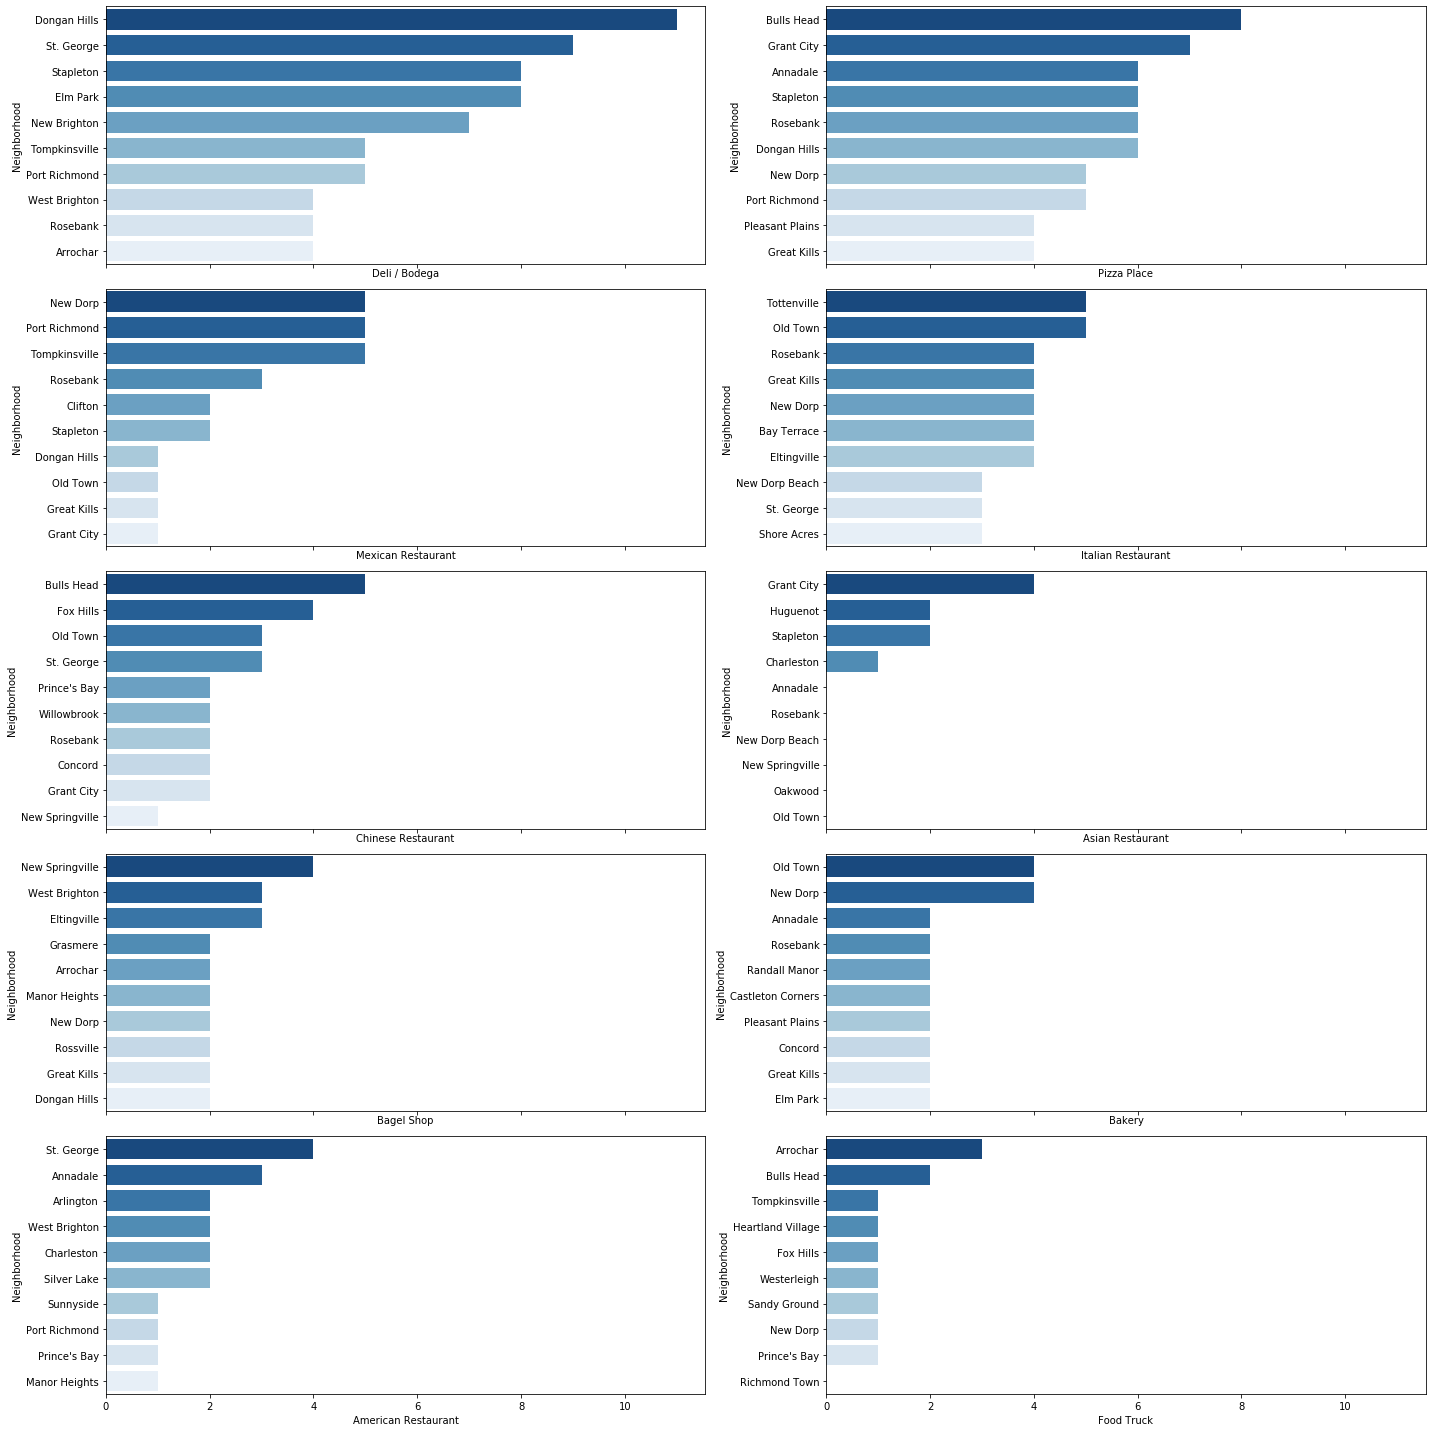

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

venue_top10_list = venue_top10.index.values.tolist()

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

Now group neighborhoods by taking the mean of the frequency of occurrence of each restaurent/place.

In [33]:
SI_grouped = SI_onehot.groupby('Neighborhood').mean().reset_index()
SI_grouped.head()

Neighborhood  African Restaurant  American Restaurant  Asian Restaurant  \
0       Annadale                 0.0             0.200000               0.0   
1  Arden Heights                 0.0             0.000000               0.0   
2      Arlington                 0.0             0.333333               0.0   
3       Arrochar                 0.0             0.000000               0.0   
4    Bay Terrace                 0.0             0.000000               0.0   

   BBQ Joint  Bagel Shop    Bakery  Bistro  Burger Joint  Burrito Place  \
0        0.0    0.066667  0.133333     0.0           0.0            0.0   
1        0.0    0.000000  0.000000     0.0           0.0            0.0   
2        0.0    0.000000  0.000000     0.0           0.0            0.0   
3        0.0    0.111111  0.000000     0.0           0.0            0.0   
4        0.0    0.000000  0.000000     0.0           0.0            0.0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                        0.0              0.000000            0.000000   
1                        0.0              0.000000            0.000000   
2                        0.0              0.166667            0.000000   
3                        0.0              0.000000            0.055556   
4                        0.0              0.000000            0.000000   

   Comfort Food Restaurant  Deli / Bodega  Dim Sum Restaurant     Diner  \
0                      0.0       0.066667                 0.0  0.066667   
1                      0.0       0.500000                 0.0  0.000000   
2                      0.0       0.166667                 0.0  0.000000   
3                      0.0       0.222222                 0.0  0.000000   
4                      0.0       0.111111                 0.0  0.000000   

   Donut Shop  Eastern European Restaurant  Empanada Restaurant  \
0    0.000000                          0.0                  0.0   
1    0.000000                          0.0                  0.0   
2    0.000000                          0.0                  0.0   
3    0.000000                          0.0                  0.0   
4    0.111111                          0.0                  0.0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                 0.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   
2                 0.0                   0.0                  0.0   
3                 0.0                   0.0                  0.0   
4                 0.0                   0.0                  0.0   

   Fish & Chips Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                0.0    0.000000           0.000000                  0.0   
1                0.0    0.000000           0.000000                  0.0   
2                0.0    0.000000           0.000000                  0.0   
3                0.0    0.166667           0.000000                  0.0   
4                0.0    0.000000           0.111111                  0.0   

   Frozen Yogurt Shop  German Restaurant  Gluten-free Restaurant  \
0                 0.0                0.0                     0.0   
1                 0.0                0.0                     0.0   
2                 0.0                0.0                     0.0   
3                 0.0                0.0                     0.0   
4                 0.0                0.0                     0.0   

   Gourmet Shop  Greek Restaurant  Halal Restaurant  Hot Dog Joint  \
0           0.0               0.0               0.0            0.0   
1           0.0               0.0               0.0            0.0   
2           0.0               0.0               0.0            0.0   
3           0.0               0.0               0.0            0.0   
4           0.0               0.0               0.0            0.0   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0 

In [34]:
# function to sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 5 venues for each neighborhood.

In [35]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [36]:
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SI_grouped['Neighborhood']

for ind in np.arange(SI_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SI_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Annadale           Pizza Place   American Restaurant   
1  Arden Heights           Pizza Place         Deli / Bodega   
2      Arlington   American Restaurant   Peruvian Restaurant   
3       Arrochar           Pizza Place         Deli / Bodega   
4    Bay Terrace    Italian Restaurant      Sushi Restaurant   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  
0                Bakery                   Diner            Bagel Shop  
1           Wings Joint  Gluten-free Restaurant     German Restaurant  
2           Pizza Place           Deli / Bodega  Caribbean Restaurant  
3            Food Truck      Italian Restaurant            Bagel Shop  
4            Donut Shop           Deli / Bodega     French Restaurant

Above we can see how nieghborhoods are stacked with their top 5 most common venues. This data can be further explored based on Stake holders interest and time alloted for the project.

## Cluster Neighborhoods

## Machine learning

k-means’ is an unsupervised machine learning algorithm which creates clusters of data points aggregated together because of certain similarities. This algorithm will be used to count neighborhoods for each cluster label for variable cluster size.

To implement this algorithm, it is very important to determine the optimal number of clusters (i.e. k). There are 2 most popular methods for the same, namely ‘The Elbow Method’ and ‘The Silhouette Method’.

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [37]:
SI_grouped_clustering = SI_grouped.drop('Neighborhood', 1)


Determine the optimal number of clusters for k-means clustering

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

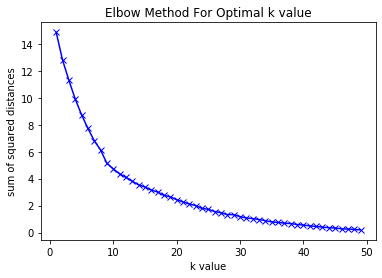

In [38]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(SI_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k value')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal k value');

There seems to be a slight bend at 9, but confirm this with Silhouette Method. 

Silhouette Method measures how similar a point is to its own cluster compared to other clusters. It requires minimum 2 clusters to define dissimilarity number of clusters, values from 2 to 24 are used here.

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

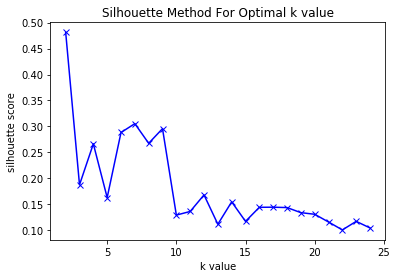

In [39]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,25) # minimum 2 clusters required, to define dissimilarity

for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(SI_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(SI_grouped_clustering, labels, metric = 'euclidean'))

plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k value')
plt.ylabel('silhouette score')
plt.title('Silhouette Method For Optimal k value')
plt.show()

There is a peak at k = 2,4,6 & 9. Since Elbow method also gave a result of 9 as best value, use 9 clusters

In [94]:
kclusters = 9

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=25).fit(SI_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({2: 25, 7: 18, 6: 5, 1: 3, 3: 2, 0: 2, 4: 2, 5: 1, 8: 1})


Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [95]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted.head(5)

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               2       Annadale           Pizza Place   American Restaurant   
1               0  Arden Heights           Pizza Place         Deli / Bodega   
2               1      Arlington   American Restaurant   Peruvian Restaurant   
3               2       Arrochar           Pizza Place         Deli / Bodega   
4               4    Bay Terrace    Italian Restaurant      Sushi Restaurant   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  
0                Bakery                   Diner            Bagel Shop  
1           Wings Joint  Gluten-free Restaurant     German Restaurant  
2           Pizza Place           Deli / Bodega  Caribbean Restaurant  
3            Food Truck      Italian Restaurant            Bagel Shop  
4            Donut Shop           Deli / Bodega     French Restaurant

In [96]:
# merge neighborhoods_venues_sorted with SI_data to add latitude/longitude for each neighborhood
SI_merged = neighborhoods_venues_sorted.join(SI_neighborhoods.set_index('Neighborhood'), on='Neighborhood')
SI_merged.head()

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               2       Annadale           Pizza Place   American Restaurant   
1               0  Arden Heights           Pizza Place         Deli / Bodega   
2               1      Arlington   American Restaurant   Peruvian Restaurant   
3               2       Arrochar           Pizza Place         Deli / Bodega   
4               4    Bay Terrace    Italian Restaurant      Sushi Restaurant   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                Bakery                   Diner            Bagel Shop   
1           Wings Joint  Gluten-free Restaurant     German Restaurant   
2           Pizza Place           Deli / Bodega  Caribbean Restaurant   
3            Food Truck      Italian Restaurant            Bagel Shop   
4            Donut Shop           Deli / Bodega     French Restaurant   

         Borough   Latitude  Longitude  
0  Staten Island  40.538114 -74.178549  
1  Staten Island  40.549286 -74.185887  
2  Staten Island  40.635325 -74.165104  
3  Staten Island  40.596313 -74.067124  
4  Staten Island  40.553988 -74.139166

Visualize the resulting clusters with map of New York City

In [97]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SI_merged['Latitude'], SI_merged['Longitude'], SI_merged['Neighborhood'], SI_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results

### Cluster 0

In [98]:
cluster_0 = SI_merged.loc[SI_merged['Cluster Labels'] == 0, SI_merged.columns[1:10]]
cluster_0.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1   Arden Heights           Pizza Place         Deli / Bodega   
30  Midland Beach         Deli / Bodega           Pizza Place   
31   New Brighton         Deli / Bodega    Chinese Restaurant   
48    South Beach         Deli / Bodega           Wings Joint   

   3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
1            Wings Joint  Gluten-free Restaurant       German Restaurant   
30    Chinese Restaurant             Wings Joint     Filipino Restaurant   
31           Pizza Place             Wings Joint     Filipino Restaurant   
48            Donut Shop            Gourmet Shop  Gluten-free Restaurant   

          Borough   Latitude  Longitude  
1   Staten Island  40.549286 -74.185887  
30  Staten Island  40.573527 -74.093483  
31  Staten Island  40.640615 -74.087017  
48  Staten Island  40.580247 -74.079553

In [99]:
required_column_indices = [2,3,1]
required_column = [list(SI_merged.columns.values)[i] for i in required_column_indices]
required_column

['1st Most Common Venue', '2nd Most Common Venue', 'Neighborhood']

In [100]:
separator = '*'*50
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print(separator)

Deli / Bodega    3
Pizza Place      1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint           1
Pizza Place           1
Deli / Bodega         1
Chinese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Arden Heights    1
New Brighton     1
South Beach      1
Midland Beach    1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 0 is dominated by deli/bodega with pizza place in second spot.

### Cluster 1

In [102]:
cluster_1 = SI_merged.loc[SI_merged['Cluster Labels'] == 1, SI_merged.columns[1:10]]
cluster_1.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2     Arlington   American Restaurant   Peruvian Restaurant   
47  Silver Lake   American Restaurant          Burger Joint   
51    Sunnyside   American Restaurant                Bistro   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2            Pizza Place         Deli / Bodega  Caribbean Restaurant   
47     French Restaurant   Empanada Restaurant    Falafel Restaurant   
51           Wings Joint            Food Truck   Empanada Restaurant   

          Borough   Latitude  Longitude  
2   Staten Island  40.635325 -74.165104  
47  Staten Island  40.619193 -74.096290  
51  Staten Island  40.612760 -74.097126

In [103]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print(separator)

American Restaurant    3
Name: 1st Most Common Venue, dtype: int64
**************************************************
Peruvian Restaurant    1
Burger Joint           1
Bistro                 1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Sunnyside      1
Silver Lake    1
Arlington      1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 1 is clearly dominated by American Restaurents

### Cluster 2

In [104]:
cluster_2 = SI_merged.loc[SI_merged['Cluster Labels'] == 2, SI_merged.columns[1:10]]
cluster_2.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Annadale           Pizza Place   American Restaurant   
3           Arrochar           Pizza Place         Deli / Bodega   
5         Bulls Head           Pizza Place    Chinese Restaurant   
7  Castleton Corners         Deli / Bodega                Bakery   
8         Charleston   American Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                 Diner            Bagel Shop   
3            Food Truck    Italian Restaurant            Bagel Shop   
5         Deli / Bodega        Ice Cream Shop  Fast Food Restaurant   
7           Pizza Place    Italian Restaurant             BBQ Joint   
8                 Diner                Bakery   Japanese Restaurant   

         Borough   Latitude  Longitude  
0  Staten Island  40.538114 -74.178549  
3  Staten Island  40.596313 -74.067124  
5  Staten Island  40.609592 -74.159409  
7  Staten Island  40.613336 -74.119181  
8  Staten Island  40.530531 -74.232158

In [105]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print(separator)

Pizza Place            14
Deli / Bodega          11
Bagel Shop              2
Italian Restaurant      2
Donut Shop              2
Mexican Restaurant      1
Chinese Restaurant      1
Sushi Restaurant        1
Ice Cream Shop          1
American Restaurant     1
Asian Restaurant        1
Diner                   1
Fish & Chips Shop       1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Deli / Bodega          8
Pizza Place            7
Italian Restaurant     6
American Restaurant    3
Bakery                 3
Bagel Shop             3
Chinese Restaurant     3
Ice Cream Shop         2
Mexican Restaurant     2
African Restaurant     1
Asian Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Randall Manor        1
Concord              1
New Springville      1
Castleton Corners    1
Mariner's Harbor     1
Greenridge           1
Woodrow              1
Stapleton            1
Charleston       

Cluster 2 is dominated by pizza and deli/bodega by far, which is clear indication that residents of these neighbourhoods are Italian cusine fans.

### Cluster 3

In [106]:
cluster_3 = SI_merged.loc[SI_merged['Cluster Labels'] == 3, SI_merged.columns[1:10]]
cluster_3.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6   Butler Manor             BBQ Joint           Wings Joint   
35       Oakwood             BBQ Joint           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
6             Donut Shop          Gourmet Shop  Gluten-free Restaurant   
35            Donut Shop          Gourmet Shop  Gluten-free Restaurant   

          Borough   Latitude  Longitude  
6   Staten Island  40.506082 -74.229504  
35  Staten Island  40.558462 -74.121566

In [107]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print(separator)

BBQ Joint    2
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint    2
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Butler Manor    1
Oakwood         1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 3 is dominated by BBQ and wings which is an indication that these residents like pure meat that fancy restaunts. It might also indicate that these residents are medium income resources.

### Cluster 4

In [108]:
cluster_4 = SI_merged.loc[SI_merged['Cluster Labels'] == 4, SI_merged.columns[1:10]]
cluster_4.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4       Bay Terrace    Italian Restaurant      Sushi Restaurant   
13      Egbertville    Italian Restaurant            Bagel Shop   
25     Howland Hook    Italian Restaurant           Wings Joint   
27  Lighthouse Hill    Italian Restaurant                Bakery   
33   New Dorp Beach    Italian Restaurant         Deli / Bodega   

   3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
4             Donut Shop           Deli / Bodega       French Restaurant   
13           Wings Joint              Donut Shop  Gluten-free Restaurant   
25      Greek Restaurant  Gluten-free Restaurant       German Restaurant   
27           Wings Joint              Donut Shop  Gluten-free Restaurant   
33                 Diner               BBQ Joint             Pizza Place   

          Borough   Latitude  Longitude  
4   Staten Island  40.553988 -74.139166  
13  Staten Island  40.579119 -74.127272  
25  Staten Island  40.638433 -74.186223  
27  Staten Island  40.576506 -74.137927  
33  Staten Island  40.564255 -74.104327

In [109]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print(separator)

Italian Restaurant    6
Name: 1st Most Common Venue, dtype: int64
**************************************************
Sushi Restaurant       1
Wings Joint            1
Deli / Bodega          1
Bakery                 1
American Restaurant    1
Bagel Shop             1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Tottenville        1
Lighthouse Hill    1
New Dorp Beach     1
Howland Hook       1
Bay Terrace        1
Egbertville        1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 4 again is clearly dominated by Italian restaurents giving an impression that Staten Island residents are Italian food fans.

### Cluster 5

In [110]:
cluster_5 = SI_merged.loc[SI_merged['Cluster Labels'] == 5, SI_merged.columns[1:10]]
cluster_5.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
41  Richmond Town            Bagel Shop           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
41            Donut Shop          Gourmet Shop  Gluten-free Restaurant   

          Borough   Latitude  Longitude  
41  Staten Island  40.569606 -74.134057

In [111]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print(separator)

Bagel Shop    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint    1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Richmond Town    1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 5 has only one neighborhood with bagel shop as most common restaurent making it unique with wings joint in second place.

### Cluster 6

In [112]:
cluster_6 = SI_merged.loc[SI_merged['Cluster Labels'] == 6, SI_merged.columns[1:10]]
cluster_6.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
18  Graniteville        Sandwich Place           Wings Joint   

   3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
18                 Diner  Gluten-free Restaurant     German Restaurant   

          Borough   Latitude  Longitude  
18  Staten Island  40.620172 -74.153152

In [113]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print(separator)

Sandwich Place    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint    1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Graniteville    1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 6 also has only one neighborhood with Sandwich place as most common venue and wings joint as second most common place.

### Cluster 7

In [114]:
cluster_7 = SI_merged.loc[SI_merged['Cluster Labels'] == 7, SI_merged.columns[1:10]]
cluster_7.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
16  Emerson Hill                Bistro           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
16            Donut Shop          Gourmet Shop  Gluten-free Restaurant   

          Borough   Latitude  Longitude  
16  Staten Island  40.606794 -74.097762

In [115]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print(separator)

Bistro    1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint    1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Emerson Hill    1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 7 has one neighborhood Emerson Hill with Bistro as most common place and yet again Wings joint as second most common.

### Cluster 8

In [118]:
cluster_8 = SI_merged.loc[SI_merged['Cluster Labels'] == 8, SI_merged.columns[1:10]]
cluster_8.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
24  Heartland Village            Food Truck           Wings Joint   
45       Sandy Ground      Greek Restaurant            Food Truck   

    3rd Most Common Venue  4th Most Common Venue   5th Most Common Venue  \
24  Vietnamese Restaurant           Gourmet Shop  Gluten-free Restaurant   
45      Fish & Chips Shop  Vietnamese Restaurant            Gourmet Shop   

          Borough   Latitude  Longitude  
24  Staten Island  40.589139 -74.159022  
45  Staten Island  40.541140 -74.217766

In [119]:
for col in required_column:
    print(cluster_8[col].value_counts(ascending = False))
    print(separator)

Greek Restaurant    1
Food Truck          1
Name: 1st Most Common Venue, dtype: int64
**************************************************
Wings Joint    1
Food Truck     1
Name: 2nd Most Common Venue, dtype: int64
**************************************************
Sandy Ground         1
Heartland Village    1
Name: Neighborhood, dtype: int64
**************************************************


Cluster 8 is dominated by food trucks by being first and second most common venues of the two neighborhoods.

# Discussion

With above analysis we get an idea that Staten Island residents are more fond of Italian food or Wings Joint. 

Grouping all clusters together we get below and ofcourse neighbourhoods 

    Clusters	1st most common	      2nd most common       Neighborhoods
            0	Deli / Bodega	      Pizza Place           multiple
            1	American Restaurant	  neither               multiple
            2	Pizza Place	          Deli / Bodega         multiple
            3	BBQ Joint	          Wings Joint           Butler Manor/Oakwood
            4	Italian Restaurant	  neither               multiple
            5	Bagel Shop	          Wings Joint           Richmond Town
            6	Sandwich place	      Wings Joint           Graniteville
            7	Bistro	              Wings Joint           Emerson Hill
            8	Food Truck	          Greek Restaurent      Heartland Village

With our analysis, there are two ways to identify a neighborhood for new restaurent.
 1. Choosing a cusine which is most famous in Staten Island and the neighborhoods where more of the same restaurents exist because this is an indication that residents of these neighborhoods are more fond of a specific cusine and likey to accept a new restaurent which serves better food. 
 
 If this option is choosen, pizza place, Italian restaurent, deli/bodega and American restaurents are options upscale restaurents and BBQ joint or Wings joint are options for mid to low end restaurents. Suitable neighborhoods for these cuisines can be found using above clusters and dataframe.
 
 
 2. Choosing a cusine which is not common in a neighborhood is another option giving oppurtunity to serve food which is not available at many restaurents. An example could be South Indian restuarent or Punjabi restaurent. 
 
 A caution of advise for the second option is to not open an high end restaurent in neighborhood which are dominated by wings joint because residents of these neighborhoods might not be able to afford a high end restaurent. This will be cleared when this analysis is taken further by adding mean house hold income and other factors of neighborhoods.

# Conclusion

New York City neighborhoods location data was used to filter out Staten Island neighborhoods, Foursquare API was used to find venues within a radius of 400 m, data was cleaned by removing general venues such as cafe, bar and top 10 restaurents and their neighborhood locations were identified and plotted. 

Further to this k-means algorithem was used to cluster the Staten Island neighborhoods into 9 different clusters and their first & second most common restaurents along with neighborhoods were identified and plotted. 

Two options were provided to setup new restaurent in Staten Island. This can be taken further by using New York City local housing and demographic trends using https://furmancenter.org/neighborhoods and/or NYC planning population fact finder https://popfactfinder.planning.nyc.gov/#13.44/40.77473/-73.96117 and real estate database https://www.zillow.com/ or walkability services and apartment search tool https://www.walkscore.com/ to futher explore NYC based on stakeholders interest, time/budget.